# minigst Python Package Tutorial

This notebook demonstrates the basic usage of the minigst Python package, which provides wrapper functions for gstlearn.

## Installation

First, make sure you have gstlearn installed. Then install minigst:

```bash
cd python
pip install .
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import minigst as mg

# Set random seed for reproducibility
np.random.seed(42)

## 1. Creating Database Objects

### From a DataFrame

In [2]:
# Create a sample dataset
n_points = 100
data = pd.DataFrame({
    'x': np.random.uniform(0, 100, n_points),
    'y': np.random.uniform(0, 100, n_points),
    'temperature': np.random.randn(n_points) * 5 + 20,
    'elevation': np.random.randn(n_points) * 100 + 500
})

print("Sample data:")
print(data.head())

# Convert to Db
db = mg.df_to_db(data, coord_names=['x', 'y'])
print(f"\nCreated Db with {db.getNSample()} samples")

Sample data:
           x          y  temperature   elevation
0  37.454012   3.142919    16.599876  712.215620
1  95.071431  63.641041    21.161268  603.246526
2  73.199394  31.435598    21.465362  348.063003
3  59.865848  50.857069    16.428243  451.576593
4  15.601864  90.756647    29.328873  626.691115

Created Db with 100 samples


### Creating a Grid

In [3]:
# Create a regular grid
grid = mg.create_db_grid(nx=[50, 50], dx=[2.0, 2.0], x0=[0, 0])
print(f"Created grid with {grid.getNSample()} cells")
print(f"Grid dimensions: {grid.getNXs()}")

Created grid with 2500 cells
Grid dimensions: [50 50]


## 2. Summary Statistics

In [4]:
# Compute summary statistics
stats = mg.summary_stats(db, vname=['temperature', 'elevation'])
print("Summary Statistics:")
print(stats)

Summary Statistics:
             NUM         MIN         MAX        MEAN       STDV         MED
temperature  100    9.874287   39.263657   20.540167   5.028594   20.899088
elevation    100  175.873266  713.303337  502.679512  93.422665  504.540296


## 3. Plotting Data

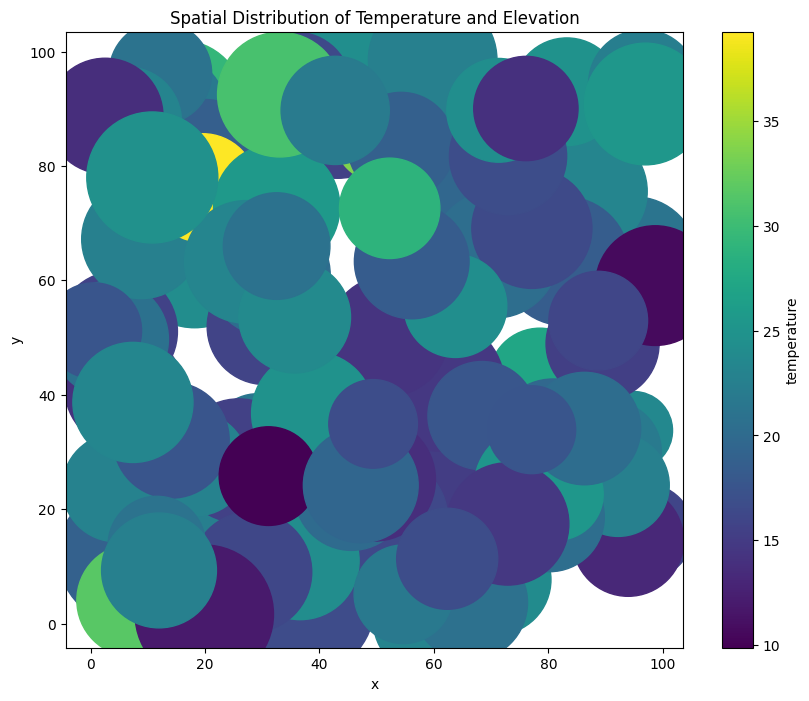

In [5]:
# Plot points with color based on temperature
fig, ax = plt.subplots(figsize=(10, 8))
mg.dbplot_point(db, color='temperature', size='elevation', 
                size_range=(10, 100), ax=ax,
                title='Spatial Distribution of Temperature and Elevation')
plt.show()

## 4. Variography

### Compute Experimental Variogram

In [6]:
# Compute omnidirectional variogram
vario = mg.vario_exp(db, vname='temperature', nlag=15, dlag=7.0)
print("Experimental variogram computed")

Experimental variogram computed


### Fit Variogram Model

In [7]:
# Fit a variogram model
model = mg.model_fit(vario, struct=['NUGGET', 'SPHERICAL'])
print(f"Model fitted with {model.getCovaNumber()} structures")

TypeError: 'ndim' is an invalid keyword argument for Model_createFromParam()

## 5. Kriging

### Ordinary Kriging

In [ ]:
# Perform ordinary kriging
mg.minikriging(db, grid, vname='temperature', model=model, 
               type='ordinary', std=True, prefix='OK')
print("Kriging completed")
print(f"Output variables: {[name for name in grid.getAllNames() if 'OK.' in name]}")

### Visualize Kriging Results

In [ ]:
# Plot kriging results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot predictions
mg.dbplot_grid(grid, color='OK.temperature.estim', ax=axes[0],
               title='Kriging Predictions', cmap='RdYlBu_r')
mg.add_points(data['x'], data['y'], ax=axes[0], color='black', 
              marker='o', size=10)

# Plot standard deviations
mg.dbplot_grid(grid, color='OK.temperature.stdev', ax=axes[1],
               title='Kriging Standard Deviation', cmap='viridis')
mg.add_points(data['x'], data['y'], ax=axes[1], color='white', 
              marker='o', size=10)

plt.tight_layout()
plt.show()

## 6. Cross-Validation

In [ ]:
# Perform cross-validation
mg.minixvalid(db, vname='temperature', model=model, 
              type='ordinary', std=True, prefix='XV')
print("Cross-validation completed")

# Get cross-validation errors
xv_error = db['XV.temperature.esterr']
print(f"\nCross-validation error statistics:")
print(f"Mean error: {np.nanmean(xv_error):.4f}")
print(f"Std error: {np.nanstd(xv_error):.4f}")
print(f"RMSE: {np.sqrt(np.nanmean(xv_error**2)):.4f}")

## 7. Gaussian Simulation

In [ ]:
# Create a new grid for simulation
sim_grid = mg.create_db_grid(nx=[50, 50], dx=[2.0, 2.0], x0=[0, 0])

# Generate unconditional simulations
mg.simulate_gauss_rf(sim_grid, model, nsim=3, seed=42)
print("Simulations generated")

In [ ]:
# Plot simulations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    mg.dbplot_grid(sim_grid, color=f'Simu.{i+1}', ax=axes[i],
                   title=f'Simulation {i+1}', cmap='RdYlBu_r')

plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated the main features of the minigst Python package:

1. Creating Db and DbGrid objects from DataFrames
2. Computing summary statistics
3. Plotting spatial data
4. Computing and fitting variograms
5. Performing kriging predictions
6. Cross-validation
7. Gaussian random field simulations

For more information, see the [minigst documentation](https://github.com/mike-pereira/minigst).